In [7]:
## Convert bmp masks to nifti files

In [11]:
import cv2
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from pathlib import Path

In [12]:
def extract_color(image, color_name):
    # Convert image to HSL color space
    hsl_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    
    # Define color ranges for yellow, green, and blue in HSL space
    color_ranges = {
        'yellow': ((20, 100, 100), (40, 255, 255)),  # Define range yellow for tumor
        'green': ((40, 100, 100), (80, 255, 255)),    # Define range green for cortex
        'blue': ((90, 100, 100), (160, 255, 255))     # Define range blue for medulla
    }
    
    # Get lower and upper bounds for the specified color
    lower_bound, upper_bound = color_ranges[color_name]
    
    # Create a mask using the specified color range
    mask = cv2.inRange(hsl_image, lower_bound, upper_bound)
    
    return mask

In [13]:
# test a single image
image = cv2.imread('YU FU CHANG_Axial+057.60-000.bmp')  # Replace 'your_image.jpg' with the path to your image

# Extract masks for yellow, green, and blue
yellow_mask = extract_color(image, 'yellow')
green_mask = extract_color(image, 'green')
blue_mask = extract_color(image, 'blue')

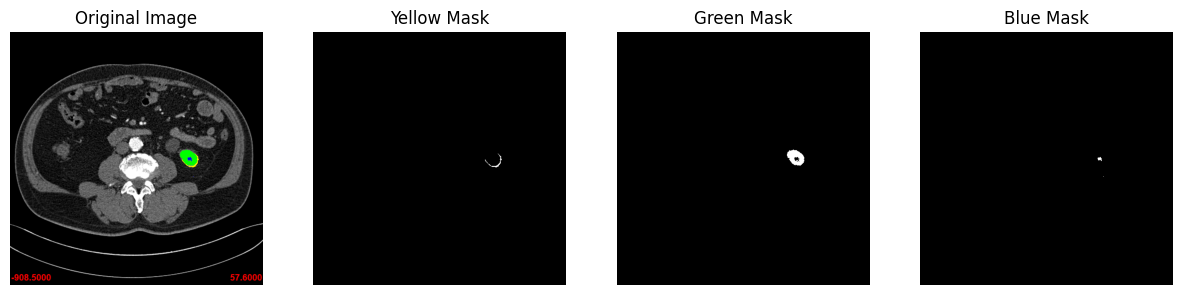

In [14]:
# Display the original image and masks using matplotlib
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Yellow Mask
plt.subplot(1, 4, 2)
plt.imshow(yellow_mask, cmap='gray')
plt.title('Yellow Mask')
plt.axis('off')

# Green Mask
plt.subplot(1, 4, 3)
plt.imshow(green_mask, cmap='gray')
plt.title('Green Mask')
plt.axis('off')

# Blue Mask
plt.subplot(1, 4, 4)
plt.imshow(blue_mask, cmap='gray')
plt.title('Blue Mask')
plt.axis('off')

plt.show()

In [15]:
def bmp2nifti(image_dir, out_dir, save=True):
    # Get all BMP files in the specified directory
    bmp_files = [file for file in os.listdir(image_dir) if file.endswith('.bmp')]
    bmp_files.sort()  # Sort files to ensure consistent order
    
    # Load the first BMP image to get dimensions
    first_image = cv2.imread(os.path.join(image_dir, bmp_files[0]))
    height, width = first_image.shape[:2]
    
    # Initialize an empty array to store masks
    masks = np.zeros((len(bmp_files), height, width), dtype=np.uint8)
    
    # Iterate through all BMP files and extract masks
    for idx, bmp_file in enumerate(bmp_files):
        image = cv2.imread(os.path.join(image_dir, bmp_file))
        yellow_mask = extract_color(image, 'yellow')
        green_mask = extract_color(image, 'green')
        blue_mask = extract_color(image, 'blue')
        
        # Combine masks into a single mask
        combined_mask = np.zeros_like(yellow_mask)

        # This order keep the order to show tumor in the first layer
        combined_mask[blue_mask > 0] = 3  # Medulla
        combined_mask[green_mask > 0] = 2  # Cortex
        combined_mask[yellow_mask > 0] = 1  # Tumor
        
        # Store the combined mask
        masks[idx] = combined_mask
    
    # Create a 3D volume from the stacked masks
    volume = np.transpose(masks, (2, 1, 0))

    # Rotate the volume anticlockwise by 90 degrees
    # volume = np.rot90(volume, k=1, axes=(0, 1))
    # Save the volume as a NIfTI file
    nii_save_path = os.path.join(out_dir, 'segmentation.nii.gz')
    if save:
        
        
        # Save combined mask as .nii.gz file
        affine = np.eye(4)  # Assuming identity affine matrix
        # header = nib.Nifti1Header()
        # header.set_data_shape(combined_mask.shape)
        # nifti_img = nib.Nifti1Image(volume, affine, header)
        nifti_img = nib.Nifti1Image(volume, affine)
        
        nib.save(nifti_img, 'segmentation.nii.gz')
        print(f"Segmentation saved as {nii_save_path}")
    else:
        print(f"Segmentation FAILED TO save as {nii_save_path}")
    return volume

In [16]:
## one folder test case
# image_dir = Path('/home/rusk/projects/FYP-KiTS/testbmp')
# out_dir = Path('/home/rusk/projects/FYP-KiTS/bmpout')
# segmentation_volume = bmp2nifti(image_dir, out_dir)

In [19]:
def extract_color(image, color_name):
    # Convert image to HSL color space
    hsl_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    
    # Define color ranges for yellow, green, and blue in HSL space
    color_ranges = {
        # define the color not include the red for left button text in bmp images (not 0 in Humidity)
        'not_red': ((1, 100, 100), (180, 255, 255))
    }
    
    # Get lower and upper bounds for the specified color
    lower_bound, upper_bound = color_ranges[color_name]
    
    # Create a mask using the specified color range
    mask = cv2.inRange(hsl_image, lower_bound, upper_bound)
    
    return mask

In [20]:
# test a single image
image = cv2.imread('XIAO FU ZHONG_Axial+000125-000.bmp')  # Replace 'your_image.jpg' with the path to your image

# Extract masks for yellow, green, and blue
not_red_mask = extract_color(image, 'not_red')

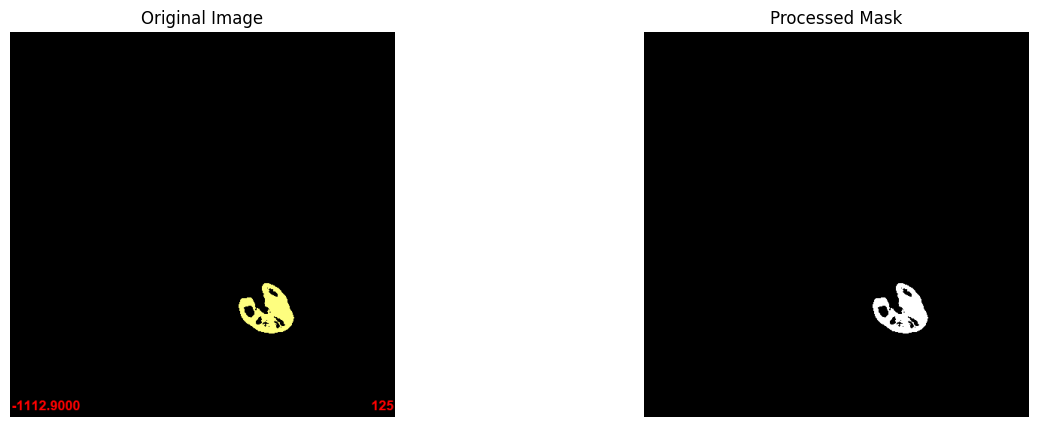

In [21]:
# Display the original image and masks using matplotlib
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Yellow Mask
plt.subplot(1, 2, 2)
plt.imshow(not_red_mask, cmap='gray')
plt.title('Processed Mask')
plt.axis('off')

plt.show()